In [117]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [118]:
import numpy as np
import pandas as pd

In [119]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [120]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [121]:
#Create an engine to connect to the database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [122]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [123]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [124]:
# Save references to each table

# Assign the measurement class to a variable called "Measurement"
Measurement = Base.classes.measurement

# Assign the station class to a variabe called "Station"
Station = Base.classes.station

In [125]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [126]:
first_row = session.query(Measurement).first()
first_row

In [127]:
# Display the row's columns and data in dictionary format (Measurement)
#first_row = session.query(Measurement).first()
#first_row.__dict__

In [128]:
# Display the row's columns and data in dictionary format (Station)
#first_row = session.query(Station).first()
#first_row.__dict__

# Exploratory Climate Analysis

In [129]:
# DESIGN A QUERY TO RETRIEVE THE LAST 12 MONTHS OF PRECIPITATION DATA AND PLOT THE RESULTS 

# Querying all records from the database
#precip = engine.execute("SELECT * FROM measurement")

#for record in precip:
#        print (record)

# Don't need to use ("SELECT * FROM") because we are using the object version of sqlalchemy (from sqlalchemy.orm import Session), so we can just pass in the class.     




In [130]:
#Explore the database and print the table names using Inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [131]:
#Print the column names and types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [132]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print ("The date 1 year ago was", year_ago)


The date 1 year ago was 2016-08-23



 ('2016-12-13', 0.05),
 ('2016-12-14', 0.03),
 ('2016-12-15', 0.0),
 ('2016-12-16', 0.0),
 ('2016-12-17', 0.01),
 ('2016-12-18', 0.13),
 ('2016-12-19', 0.01),
 ('2016-12-20', 0.0),
 ('2016-12-21', 0.0),
 ('2016-12-22', 0.01),
 ('2016-12-23', 0.01),
 ('2016-12-24', 0.01),
 ('2016-12-25', 0.0),
 ('2016-12-26', 0.02),
 ('2016-12-27', 0.0),
 ('2016-12-28', 0.02),
 ('2016-12-29', 0.04),
 ('2016-12-30', 0.12),
 ('2016-12-31', 0.01),
 ('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.0),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.0),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.0),
 ('2017-01-22', 0.16),
 ('2017-01-23', 0.0),
 ('2017-01-24', 0.04),
 ('2017-01-25', 0.03),
 ('2017-01-26',

In [133]:

#For row in session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=year_ago).all()
#    print(row)

In [134]:
# Query for the last 12 months of precipitation data selecting only the date and precipitation values
last_twelve_months=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
last_twelve_months


 ('2016-12-13', 0.05),
 ('2016-12-14', 0.03),
 ('2016-12-15', 0.0),
 ('2016-12-16', 0.0),
 ('2016-12-17', 0.01),
 ('2016-12-18', 0.13),
 ('2016-12-19', 0.01),
 ('2016-12-20', 0.0),
 ('2016-12-21', 0.0),
 ('2016-12-22', 0.01),
 ('2016-12-23', 0.01),
 ('2016-12-24', 0.01),
 ('2016-12-25', 0.0),
 ('2016-12-26', 0.02),
 ('2016-12-27', 0.0),
 ('2016-12-28', 0.02),
 ('2016-12-29', 0.04),
 ('2016-12-30', 0.12),
 ('2016-12-31', 0.01),
 ('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.0),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.0),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.0),
 ('2017-01-22', 0.16),
 ('2017-01-23', 0.0),
 ('2017-01-24', 0.04),
 ('2017-01-25', 0.03),
 ('2017-01-26',

In [135]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(last_twelve_months)
df.set_index('date')


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [136]:
# Sort the dataframe by date
df = df.sort_values("date")
df

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


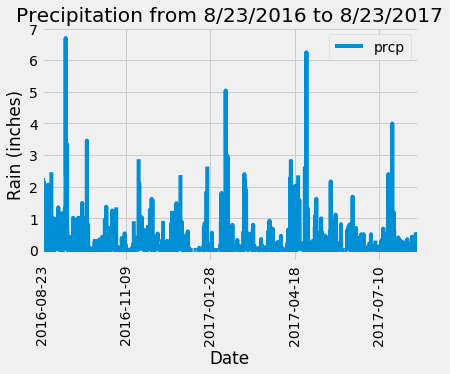

In [144]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot('date', 'prcp')
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Rain (inches)")
plt.title("Precipitation from 8/23/2016 to 8/23/2017")
fig.tight_layout()
plt.show()


In [138]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [54]:
# Design a query to show how many stations are available in this dataset?


In [55]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [56]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [57]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [58]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [59]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [60]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [61]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [62]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

NameError: name 'Measurement' is not defined

In [63]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [64]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [65]:
# Plot the daily normals as an area plot with `stacked=False`
